In [170]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "05-Matplotlib_Homework_Pymaceuticals_data_mouse_drug_data.csv"
clinical_trial_data_to_load = "05-Matplotlib_Homework_Pymaceuticals_data_clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_info = pd.read_csv(mouse_drug_data_to_load)
trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

combined_data = pd.merge(mouse_info, trial_data, on = "Mouse ID")

# Display the data table for preview

combined_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [171]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

drug_timepoint_group = combined_data.groupby(['Drug', 'Timepoint'])

mean_tumor_volume = drug_timepoint_group.mean()['Tumor Volume (mm3)']

# Convert to DataFrame

mean_tumor_volume_df = pd.DataFrame(mean_tumor_volume)

# Preview DataFrame

mean_tumor_volume_df = mean_tumor_volume_df.reset_index()

mean_tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [172]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

sem_tumor = drug_timepoint_group.sem()['Tumor Volume (mm3)']

# Convert to DataFrame

sem_tumor_df = pd.DataFrame(sem_tumor).rename(columns = {'Tumor Volume (mm3)' : 'Standard Error in Tumor Volume (mm3)'})

# Preview DataFrame

sem_tumor_df = sem_tumor_df.head().reset_index()

sem_tumor_df

,Drug,Timepoint,Standard Error in Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [173]:
# Minor Data Munging to Re-Format the Data Frames, values='Tumor Volume (mm3)'

pivot_mean_tumor_volume_df = mean_tumor_volume_df.pivot(index="Timepoint", columns="Drug", values='Tumor Volume (mm3)')

pivot_sem_tumor_df = sem_tumor_df.pivot(index="Timepoint", columns="Drug", values='Standard Error in Tumor Volume (mm3)')

# Preview that Reformatting worked

pivot_mean_tumor_volume_df.head()
pivot_mean_tumor_volume_df.columns

pivot_sem_tumor_df

Drug,Capomulin
Timepoint,
0,0.000000
5,0.448593
10,0.702684
15,0.838617
20,0.909731


In [ ]:
# Generate the Plot (with Error Bars)

#mean_tumor_volume_df.plot(kind = 'line', x = 'Timepoint', y = 'Tumor Volume (mm3)')

plt.errorbar(pivot_mean_tumor_volume_df.index, pivot_mean_tumor_volume_df['Capomulin'], yerr = pivot_sem_tumor_df['Capomulin'])

# Save the Figure



In [ ]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [177]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

mean_metsite_data = drug_timepoint_group.mean()['Metastatic Sites']

# Convert to DataFrame

mean_metsite_data_df = pd.DataFrame(mean_metsite_data)

# Preview DataFrame

mean_metsite_data_df = mean_metsite_data_df.reset_index()

mean_metsite_data_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [185]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

sem_metsites = drug_timepoint_group.sem()['Metastatic Sites']

# Convert to DataFrame

sem_metsites_df = pd.DataFrame(sem_metsites).rename(columns = {'Metastatic Sites' : 'Standard Error in Metastatic Sites'})

# Preview DataFrame

sem_metsites_df = sem_metsites_df.reset_index()

sem_metsites_df

,Drug,Timepoint,Standard Error in Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
5,Capomulin,25,0.181818
6,Capomulin,30,0.172944
7,Capomulin,35,0.169496
8,Capomulin,40,0.175610
9,Capomulin,45,0.202591


In [179]:
# Minor Data Munging to Re-Format the Data Frames

pivot_mean_metsite_data_df = mean_metsite_data_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

pivot_sem_metsites_df = sem_metsites_df.pivot(index='Timepoint', columns='Drug', values= 'Standard Error in Metastatic Sites')

# Preview that Reformatting worked

pivot_mean_metsite_data_df
pivot_sem_metsites_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


<ErrorbarContainer object of 3 artists>

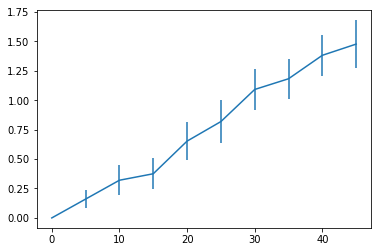

In [180]:
# Generate the Plot (with Error Bars)

plt.errorbar(pivot_mean_metsite_data_df.index, pivot_mean_metsite_data_df['Capomulin'], yerr = pivot_sem_metsites_df['Capomulin'])

# Save the Figure

# Show the Figure


## Survival Rates

In [53]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

df = drug_timepoint_group.count().reset_index()

# Grab only necessary columns and rename Mouse ID column
mice_count_df = df.iloc[:, 0:3]
mice_count_df = mice_count_df.rename(columns = {"Mouse ID" : "Mouse Count"})

# Preview DataFrame
mice_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [54]:
# Minor Data Munging to Re-Format the Data Frames

mice_count_df = mice_count_df.pivot(index = 'Timepoint', columns = 'Drug')

# Preview the Data Frame

mice_count_df

Mouse Count                                                        \
Drug        Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                     
0                  25       25        25       25       25      25       26   
5                  25       21        25       23       23      24       25   
10                 25       20        21       22       21      24       23   
15                 24       19        21       19       21      20       17   
20                 23       18        20       19       20      19       17   
25                 22       18        18       19       18      17       14   
30                 22       16        17       18       15      15       13   
35                 22       14        12       17       15      14       10   
40                 21       14        10       15       15      12        9   
45                 21       13         9       11       13      11        7   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17  
25              23       19        16  
30              23       18        15  
35              21       16        14  
40              20       12        14  
45              20       11        14

In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()